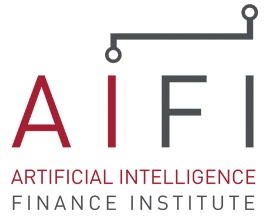


# Bootcamp - Python and Coding - Primer

# Financial Time Series Examples

# About this Notebook

This Jupyter Notebook provides a compressed overview how Python handles timeseries data, incl. a short example for a technical analysis. More how to resample and alter times series in Python can be found [here](https://pandas.pydata.org/docs/user_guide/timeseries.html).

# Imports

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import yfinance as yf
from datetime import date, datetime, timedelta
import datetime
import sys
import os
from importlib import reload 

#ignore warnings
import warnings
warnings.filterwarnings(action='ignore')


# custom library
py_file_location = '../../'
sys.path.append(os.path.abspath(py_file_location))
from customlib import plotting

In [2]:
# get info about an inport, this can be used for all imports
print(yf.__version__)

0.1.74


In [3]:
# example of upgrading a package
#!pip install yfinance -U

In [4]:
# custom styled plotting settings
%matplotlib inline
#sns.set_style('whitegrid', {'axes.facecolor': '.95'})
plt.style.use('../../custom_plot_style.mplstyle') # use the custom style sheet

# use custom styed font and image settings 
mpl.rcParams['font.family'] = 'sans-serif' 
mpl.rcParams['font.sans-serif'] = ['Tahoma']
%config InlineBackend.figure_format = 'svg'

### Datapath


In [5]:
PATH = '../../data/'

## Financial Data

### Date for Scrapping Data

In [6]:
# create date for yahoo scrapping
today = datetime.date.today()
yahoo_date = today + datetime.timedelta(days=1)
print(yahoo_date)
date = today.strftime("%Y%m%d")

2022-08-09


## Use Yahoo as Datasource

In [7]:
# create list for scrapping
ticker_list = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'WMT']

# scrape the stocks
yahoo_df = yf.download(ticker_list, 
                      start='2000-01-01', 
                      end=yahoo_date, 
                      progress=False)


# safes data as a pivot table, see more: https://pandas.pydata.org/docs/user_guide/reshaping.html
yahoo_df.tail(2)

Adj Close                                                  \
                  AAPL       GOOGL        MSFT        TSLA         WMT   
Date                                                                     
2022-08-05  165.350006  117.470001  282.910004  864.510010  126.580002   
2022-08-08  165.668503  118.260002  282.331085  905.525024  127.639999   

                 Close                                                  ...  \
                  AAPL       GOOGL        MSFT        TSLA         WMT  ...   
Date                                                                    ...   
2022-08-05  165.350006  117.470001  282.910004  864.510010  126.580002  ...   
2022-08-08  165.668503  118.260002  282.331085  905.525024  127.639999  ...   

                  Open                                                 \
                  AAPL       GOOGL        MSFT       TSLA         WMT   
Date                                                                    
2022-08-05  163.210007  116.230003  279.149994  908.01001  125.510002   
2022-08-08  166.369995  118.389999  284.049988  885.00000  126.650002   

              Volume                                              
                AAPL       GOOGL      MSFT        TSLA       WMT  
Date                                                              
2022-08-05  56646600  19148600.0  16767900  37655300.0  10663700  
2022-08-08  34575576   9601127.0   8400190  16940198.0   2736556  

[2 rows x 30 columns]

In [8]:
yahoo_df.shape

(5686, 30)

In [9]:
# reorder pivot table into standard data frame, using only Adj Close as value
df = yahoo_df.loc[:,list(yahoo_df.columns.get_level_values(level = 0) == 'Adj Close')]
df = df.loc[:,list((df.isna().all(axis = 0) == False).values)]
df.columns = df.columns.droplevel(level=0)
df.tail()

,AAPL,GOOGL,MSFT,TSLA,WMT
Date,,,,,
2022-08-02,159.788040,115.129997,274.820007,901.760010,132.679993
2022-08-03,165.899567,118.080002,282.470001,922.190002,130.500000
2022-08-04,165.580002,118.190002,283.649994,925.900024,125.570000
2022-08-05,165.350006,117.470001,282.910004,864.510010,126.580002
2022-08-08,165.668503,118.260002,282.331085,905.525024,127.639999


### Data Import

In [10]:
filename = PATH + 'tr_eikon_eod_data.csv'  

In [11]:
f = open(filename, 'r')  
# we can process the input data stream with "readlines"
f.readlines()[:5]  

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n']

In [12]:
# let pandas do the file handling
# we can read from different data types, like csv, pickle (Python object serialization) 
# see info here: https://docs.python.org/3/library/pickle.html
# Excel etc. more 
data = pd.read_csv(filename,  
                   index_col=0, 
                   parse_dates=True)  

In [13]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [14]:
data.head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [15]:
data.tail()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


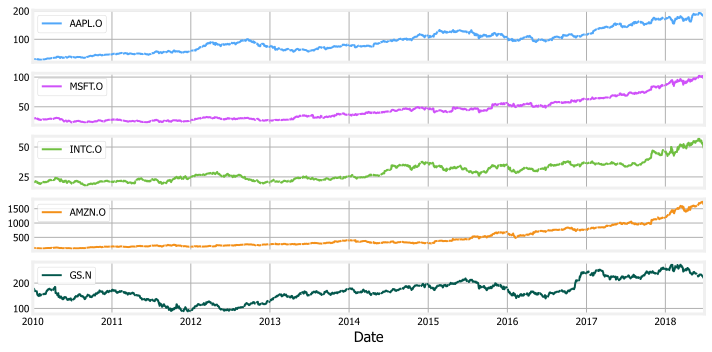

In [16]:
# limit the plot to the first 5 columns (entries/stocks)
data[data.columns[:5]].plot(figsize=(10, 5), subplots=True);  

In [17]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [18]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


### Summary Statistics

In [19]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [20]:
data.describe().round(2)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [21]:
data.mean()  

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [22]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [23]:
data.rename(columns={'EUR=': 'EUR', 'XAU=': 'XAU'}, inplace=True)

### Changes Over Time

In [24]:
data.diff().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR,XAU,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [25]:
data.diff().mean()  

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR      -0.000119
XAU       0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

In [26]:
data.pct_change().round(3).head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR,XAU,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


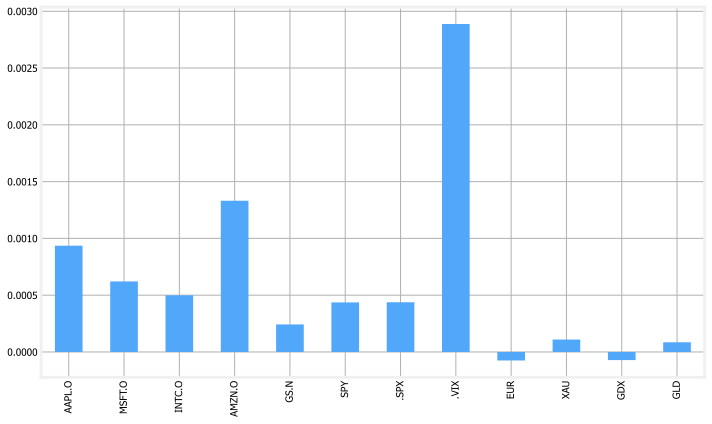

In [27]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));  

In [28]:
rets = np.log(data / data.shift(1))  

In [29]:
rets.tail(2).round(3)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR,XAU,GDX,GLD
Date,,,,,,,,,,,,
2018-06-28,0.007,0.011,0.010,0.024,0.015,0.006,0.006,-0.061,0.001,-0.003,0.005,-0.003
2018-06-29,-0.002,-0.000,0.009,-0.001,-0.013,0.001,0.001,-0.046,0.010,0.003,0.017,0.004


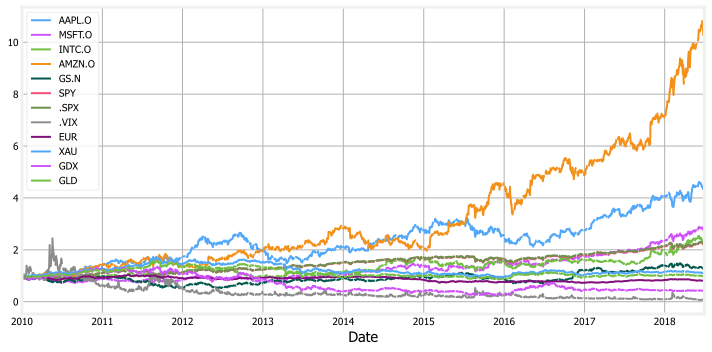

In [30]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 5));  

### Resampling

In [31]:
data.resample('1w', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR,XAU,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [32]:
data.resample('1m', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR,XAU,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


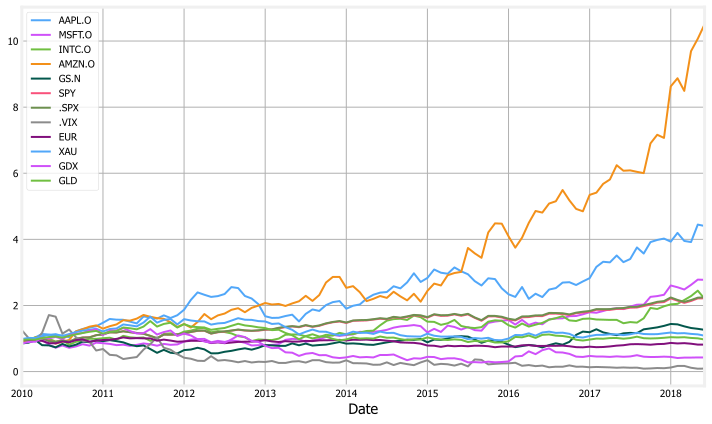

In [33]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
                          ).plot(figsize=(10, 6));  

## Rolling Statistics

In [34]:
sym = 'AAPL.O'

In [35]:
data = pd.DataFrame(data[sym]).dropna()

In [36]:
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


### An Overview

In [37]:
window = 20  

In [38]:
data['min'] = data[sym].rolling(window=window).min()  

In [39]:
data['mean'] = data[sym].rolling(window=window).mean()  

In [40]:
data['std'] = data[sym].rolling(window=window).std()  

In [41]:
data['median'] = data[sym].rolling(window=window).median()  

In [42]:
data['max'] = data[sym].rolling(window=window).max()  

In [43]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [44]:
data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


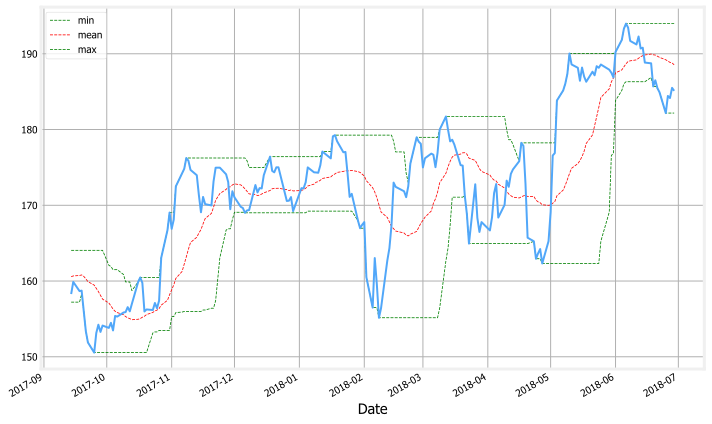

In [45]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  

# A Technical Analysis Example

In [46]:
data['SMA1'] = data[sym].rolling(window=42).mean()  

In [47]:
data['SMA2'] = data[sym].rolling(window=252).mean()  

In [48]:
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


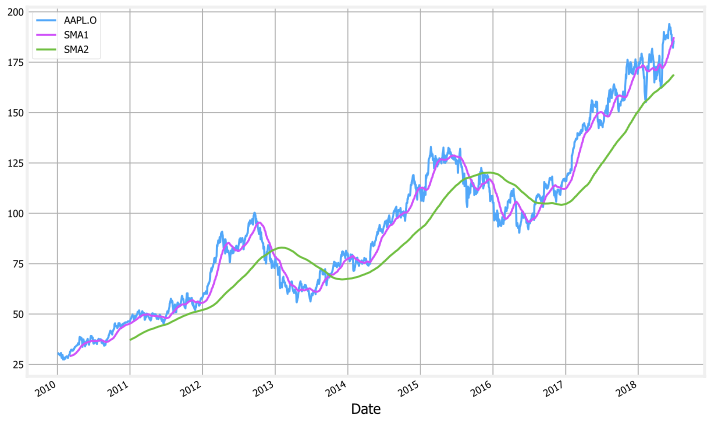

In [49]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6));  

In [50]:
data.dropna(inplace=True)  

In [51]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],  
                             1,  
                             -1)  

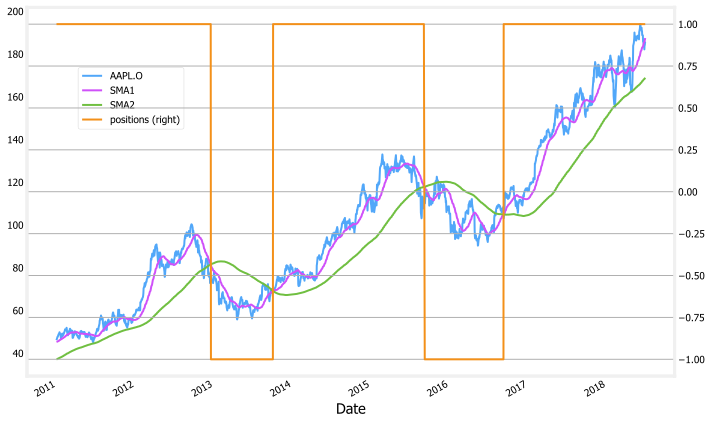

In [52]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

### The Data

In [53]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv( PATH + '/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [54]:
data = raw[['.SPX', '.VIX']].dropna()

In [55]:
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


### Log Returns

In [56]:
rets = np.log(data / data.shift(1)) 

In [57]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [58]:
rets.dropna(inplace=True)

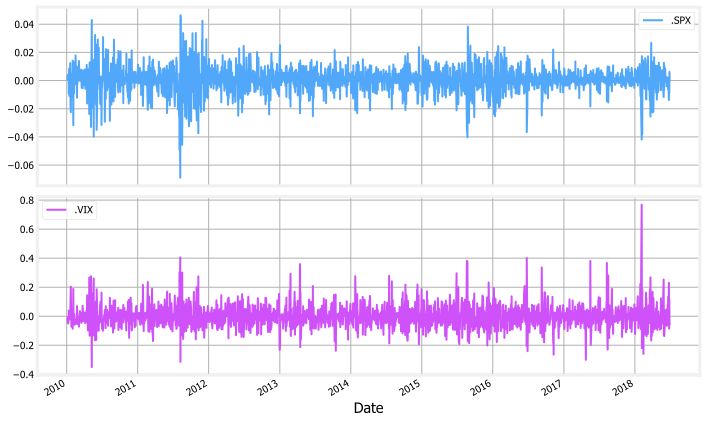

In [59]:
rets.plot(subplots=True, figsize=(10, 6));

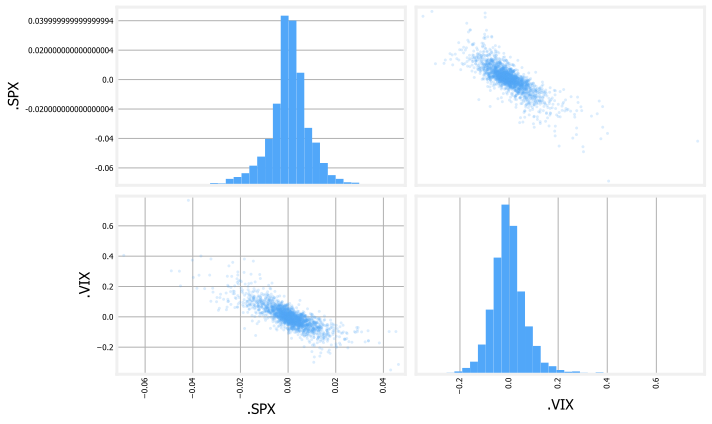

In [60]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));

### Correlation

In [61]:
rets.corr()  

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


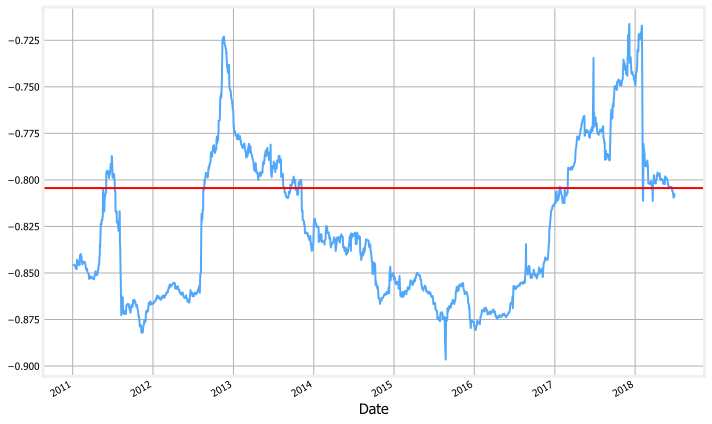

In [62]:
ax = rets['.SPX'].rolling(window=252).corr(
                  rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  

## High Frequency Data

In [63]:
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv(PATH + 'fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)

In [64]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


In [65]:
tick['Mid'] = tick.mean(axis=1)  

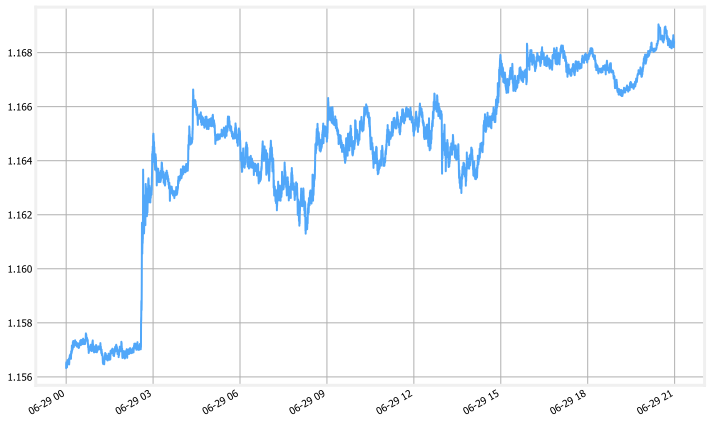

In [66]:
tick['Mid'].plot(figsize=(10, 6));

In [67]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [68]:
tick_resam.head()

,Bid,Ask,Mid
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


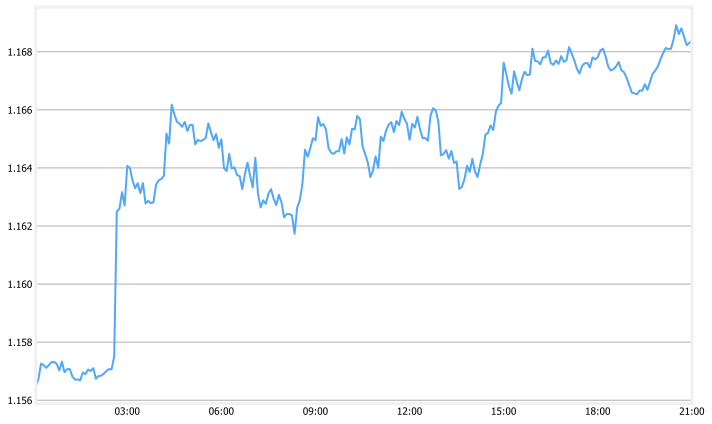

In [69]:
tick_resam['Mid'].plot(figsize=(10, 6));